In [33]:
#Importing libs
import pandas as pd
import os
import numpy as np

In [35]:
#Read file from path
file_path = r"C:\Users\Aaryan\Downloads\Test1"
file_name = "qa_accuracy_original_file.xlsx"
sheet_name = "QA Tracker"
full_file_path = os.path.join(file_path,file_name)
if os.path.exists(full_file_path):
    quality_df = pd.read_excel(full_file_path,sheet_name=sheet_name)
    print("Excel file loaded sucessfully")
else:
    print("File not available, check the path or file name")

#column values convert into lower and removig spaces    
quality_df.columns
quality_df.columns = quality_df.columns.str.lower()
quality_df.columns = quality_df.columns.str.replace(" ","_")

Excel file loaded sucessfully


In [36]:
quality_df.columns

Index(['spi_editor', 'source', 'unnamed:_2', 'dates_checked_to_mm/dd',
       '#days_checked', 'spi_qa_editor', 'date_qa'd', 'total_#_shows',
       'total_#_episodes', 'titles_correct', 'rovi_episodes_correct',
       '%_shows_correct', '%_rovi_episodes_correct', '%_correct', 'wp', 'mp',
       'ep', 'we', 'me', 'wt', 'wl', 'ml', 'mat', 'wat', 'mu', 'tv', 'ld/sd',
       'urfp', 'wrfp', 'cpr', 'ie_for_p', 'ie_for_e', 'valid_errors',
       'errors_marked', 'remarks', 'jira/non_jira', 'team',
       'qa_feedback_response', 'priority'],
      dtype='object')

In [19]:
#converting date column into date format - Data formatting
date_columns = ["dates_checked_from_mm/dd","dates_checked_to_mm/dd","date_qa'd"]
for column in date_columns:
    quality_df[column] = pd.to_datetime(quality_df[column]-25569,unit='D')
    quality_df[column]= quality_df[column].dt.strftime("%d-%m-%y")
#Remove Space from column spi_editor and replace valuce - Data deduping
quality_df['spi_editor'] = quality_df['spi_editor'].str.strip()
quality_df['spi_editor'] = quality_df['spi_editor'].replace("Vidhya","Vidhya Tekur") 

quality_df['%_shows_correct'] = pd.to_numeric(quality_df['%_shows_correct'],errors='coerce')*100
quality_df['%_rovi_episodes_correct'] = pd.to_numeric(quality_df['%_rovi_episodes_correct'],errors='coerce')*100
quality_df['%_correct'] = pd.to_numeric(quality_df['%_correct'],errors='coerce')*100

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [40]:
#Calculation - Data Calculation and Analysis
quality_df['new_%_shows_correct'] = (quality_df['titles_correct']/quality_df['total_#_shows'])*100
quality_df['new_%_rovi_episodes_correct'] = (quality_df['rovi_episodes_correct']/quality_df['total_#_episodes'])*100
quality_df['new_%_correct'] = np.where(
    quality_df['new_%_rovi_episodes_correct'].isnull(),
    quality_df['new_%_shows_correct'],
    (quality_df['new_%_shows_correct']*0.60+quality_df['new_%_rovi_episodes_correct']*0.40))

In [42]:
#drop error values - Error handling
quality_df['check'] = quality_df['new_%_correct'].round(2)==quality_df['%_correct'].round(2)
error_df = quality_df[quality_df['check']==False]
filtered_df = quality_df[quality_df['check']==True]

In [44]:
#Group by and Pivot

average_percentage_correct = filtered_df.groupby('spi_editor')['new_%_correct'].mean().round(2)
average_percentage_correct_sorted = average_percentage_correct.sort_values()

pivot_df = average_percentage_correct_sorted.reset_index()
pivot_df.rename(columns={'new_%_correct':'quality_score'},inplace=True)

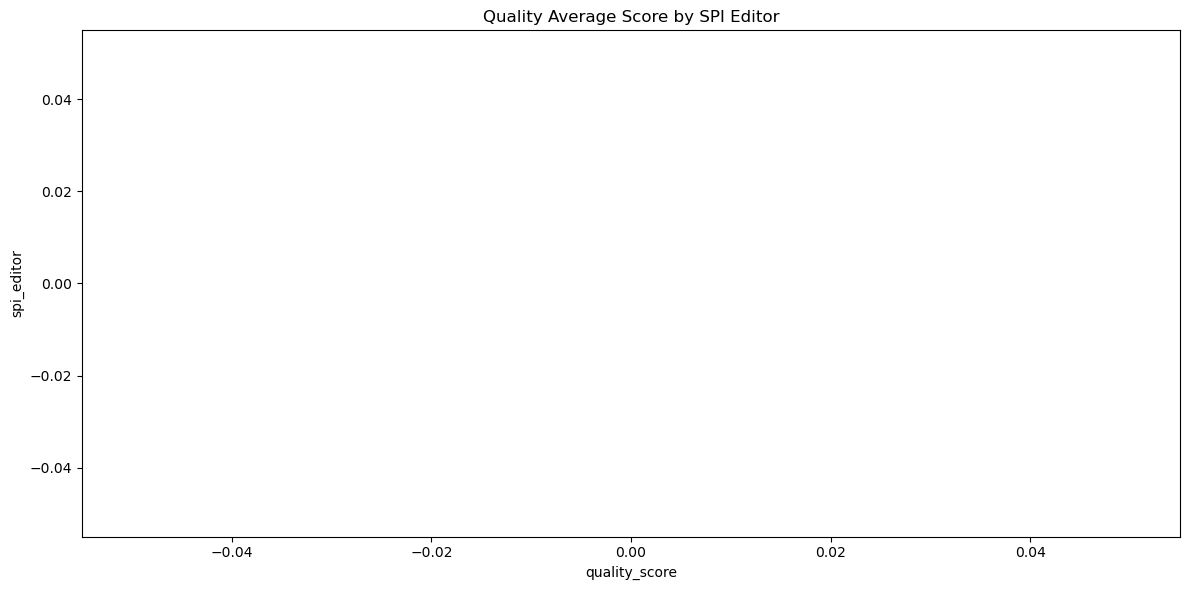

In [46]:
import matplotlib.pyplot as plt

# Create the column chart
plt.figure(figsize=(12, 6))
bars = plt.barh(pivot_df['spi_editor'], pivot_df['quality_score'], color='lightblue')

# Add data values on the right side of each bar
for bar in bars:
   xval = bar.get_width()
   plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='right', va='center')

plt.ylabel('spi_editor')
plt.xlabel('quality_score')
plt.title('Quality Average Score by SPI Editor')
plt.tight_layout()  # Adjust layout to prevent overlapping

# Show the column chart
plt.show()

In [48]:
grouped_df = filtered_df.groupby('spi_editor').agg(
    quality_score = ("new_%_correct","mean"),
    total_source_Qaed = ("spi_editor","count")
).round(2)

grouped_df = grouped_df.sort_values(by='quality_score')

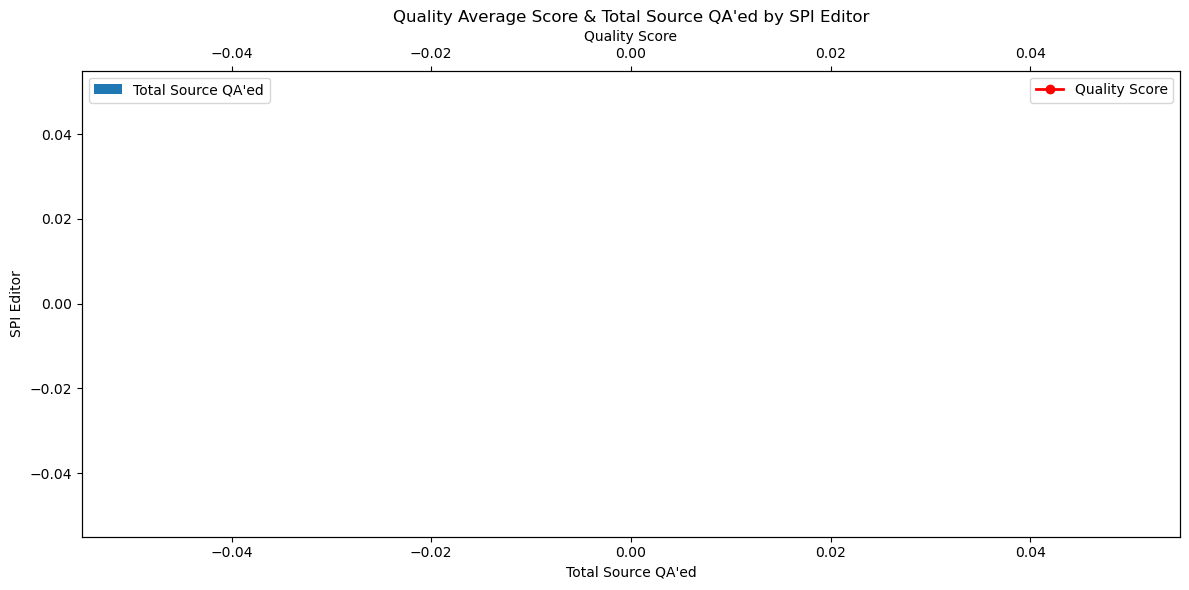

In [50]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Total Source QA'ed (blue bars)
bars = ax1.barh(pivot_df['spi_editor'], grouped_df['total_source_Qaed'], color='lightblue', label='Total Source QA\'ed')

# Add labels on bars
for bar in bars:
    xval = bar.get_width()
    ax1.text(xval, bar.get_y() + bar.get_height()/2, int(xval), ha='right', va='center')

ax1.set_xlabel('Total Source QA\'ed')
ax1.set_ylabel('SPI Editor')

# Create a second Y-axis for the line plot
ax2 = ax1.twiny()

# Line plot for Quality Score (red line)
ax2.plot(pivot_df['quality_score'], pivot_df['spi_editor'], color='red', marker='o', linestyle='-', linewidth=2, label='Quality Score')

ax2.set_xlabel('Quality Score')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Quality Average Score & Total Source QA\'ed by SPI Editor')
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
filtered_df

In [29]:
grouped_df

NameError: name 'grouped_df' is not defined

In [8]:
quality_df.columns

Index(['spi_editor', 'source', 'dates_checked_from_mm/dd',
       'dates_checked_to_mm/dd', '#days_checked', 'spi_qa_editor', 'date_qa'd',
       'total_#_shows', 'total_#_episodes', 'titles_correct',
       'rovi_episodes_correct', '%_shows_correct', '%_rovi_episodes_correct',
       '%_correct', 'wp', 'mp', 'ep', 'we', 'me', 'wt', 'wl', 'ml', 'mat',
       'wat', 'mu', 'tv', 'ld/sd', 'urfp', 'wrfp', 'cpr', 'ie_for_p',
       'ie_for_e', 'valid_errors', 'errors_marked', 'remarks', 'jira/non_jira',
       'team', 'qa_feedback_response', 'priority'],
      dtype='object')

In [4]:
quality_df.head(5)
quality_df.tail(5)
quality_df.describe()
quality_df.info()
quality_df.shape
sorted(quality_df.columns.tolist())
quality_df.isnull().sum()
quality_df.columns
quality_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spi_editor                214 non-null    object 
 1   source                    214 non-null    object 
 2   dates_checked_from_mm/dd  214 non-null    object 
 3   dates_checked_to_mm/dd    214 non-null    object 
 4   #days_checked             214 non-null    int64  
 5   spi_qa_editor             214 non-null    object 
 6   date_qa'd                 214 non-null    object 
 7   total_#_shows             214 non-null    int64  
 8   total_#_episodes          166 non-null    float64
 9   titles_correct            214 non-null    int64  
 10  rovi_episodes_correct     166 non-null    float64
 11  %_shows_correct           214 non-null    float64
 12  %_rovi_episodes_correct   166 non-null    float64
 13  %_correct                 214 non-null    float64
 14  wp        

spi_editor                   object
source                       object
dates_checked_from_mm/dd     object
dates_checked_to_mm/dd       object
#days_checked                 int64
spi_qa_editor                object
date_qa'd                    object
total_#_shows                 int64
total_#_episodes            float64
titles_correct                int64
rovi_episodes_correct       float64
%_shows_correct             float64
%_rovi_episodes_correct     float64
%_correct                   float64
wp                          float64
mp                          float64
ep                          float64
we                          float64
me                          float64
wt                          float64
wl                          float64
ml                          float64
mat                         float64
wat                         float64
mu                          float64
tv                          float64
ld/sd                       float64
urfp                        